<a href="https://colab.research.google.com/github/parthivz/Fundamentals-of-GenAI-Course-Lab/blob/main/PyTorch_2_Exercise_Autograd_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use PyTorch autograd and gradient descent for linear regression
* create a synthetic dataset with 100 data points

In [6]:
import torch as pt
import matplotlib.pyplot as plt
pt.manual_seed(0)

In [7]:
X = pt.rand(100, 1) * 10  # Random values between 0 and 10
y = 2 * X + 3 + pt.randn(100, 1) * 2  # Linear relation y = 2x + 3 + noise

## Render a scatter plot of the sample data
* remember to import `matplotlib.pyplot as plt` and set `%matplotlib inline`

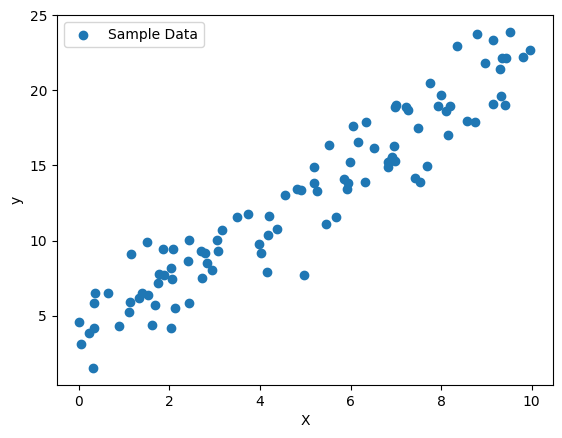

In [8]:
plt.scatter(X.numpy(), y.numpy(), label="Sample Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Initialize the model parameter
* **hint:** don't forget to set `requires_grad = True`

In [9]:
# Initialize weight and bias (parameters)
w = pt.randn(1, requires_grad=True)  # Random weight
b = pt.randn(1, requires_grad=True)  # Random bias


## Implement a `forward` method that returns the predicted values

In [10]:
def forward(x):
    return w * x + b

## Implement a `loss` method that returns the mean squared error
* **hint:** use the `pt.mean` method

In [11]:
def loss(y_pred, y_true):
    return pt.mean((y_pred - y_true) ** 2)

## Render a plot of the sample data with a line based on your model parameter
* use `detach().numpy()` on the tensor generated by your model to render it
* **hint:** reuse your `forward` function to generate the values for the line plot


In [17]:
# Training loop
learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    y_pred = forward(X)  # Forward pass
    l = loss(y_pred, y)  # Compute loss

    l.backward()  # Compute gradients

    # Gradient descent step
    with pt.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Zero gradients after update
    w.grad.zero_()
    b.grad.zero_

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {l.item()}')

print(f"Final weight: {w.item()}, Final bias: {b.item()}")


Epoch 0, Loss: 3.1647088527679443
Epoch 10, Loss: 3.1647095680236816
Epoch 20, Loss: 3.1647095680236816
Epoch 30, Loss: 3.1647090911865234
Epoch 40, Loss: 3.1647090911865234
Epoch 50, Loss: 3.1647095680236816
Epoch 60, Loss: 3.1647095680236816
Epoch 70, Loss: 3.1647095680236816
Epoch 80, Loss: 3.1647090911865234
Epoch 90, Loss: 3.1647095680236816
Final weight: 1.862829566001892, Final bias: 3.6643669605255127


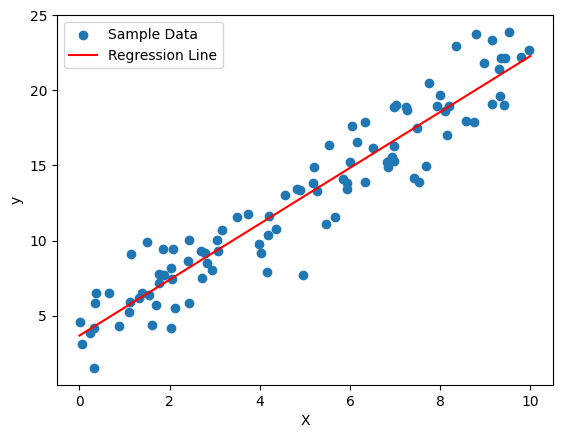

In [16]:
# Plot data points
plt.scatter(X.numpy(), y.numpy(), label="Sample Data")

# Generate predicted values
X_test = pt.linspace(0, 10, 100).reshape(-1, 1)  # Linearly spaced test inputs
y_test = forward(X_test).detach().numpy()  # Get model predictions

# Plot regression line
plt.plot(X_test.numpy(), y_test, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
